# Industrial Fault Detection Dataset

## IoT Sensor Data for Fault Classification

Этот набор данных предназначен для автоматического обнаружения неисправностей в приложениях Industry 4.0 с использованием интеллектуальных датчиков на базе IoT. Он содержит данные промышленных датчиков, собранные из различных источников, в том числе:

- Датчики температуры (°C)
- Датчики вибрации (м/с²)
- Датчики давления (кПа)
- Датчики расхода (л/мин)
- Датчики тока (А)
- Датчики напряжения (В)

Набор данных включает метку Fault_Type с четырьмя категориями:
- 0 → Отсутствие неисправности (нормальная работа)
- 1 → Неисправность, связанная с перегревом
- 2 → Неисправность, связанная с утечкой
- 3 → Неисправность, связанная с колебаниями напряжения

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('/Users/kathrinebovkun/PycharmProjects/experiments/data/Industrial_fault_detection.csv')
# df['Time'] = pd.to_datetime(df['Time'])
df

,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0
1,62.529168,2.573668,76.159843,8.279230,14.906390,215.465859,767.602396,32.395556,962.481517,8.365137,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0
2,77.295015,3.243491,92.372614,9.172789,15.054051,202.043568,765.965069,32.032039,956.299456,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0
3,76.564164,3.142904,94.149558,13.775375,16.417891,216.699098,763.936438,33.039854,956.532232,10.251866,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0
4,78.281641,3.139960,94.441006,11.113106,10.899425,227.328291,746.754887,33.018729,950.212816,18.313107,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,10.056915,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
996,75.584630,3.035014,96.951461,5.844376,17.134232,231.526481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
997,77.158833,2.925378,98.544780,9.359404,24.338731,207.825962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


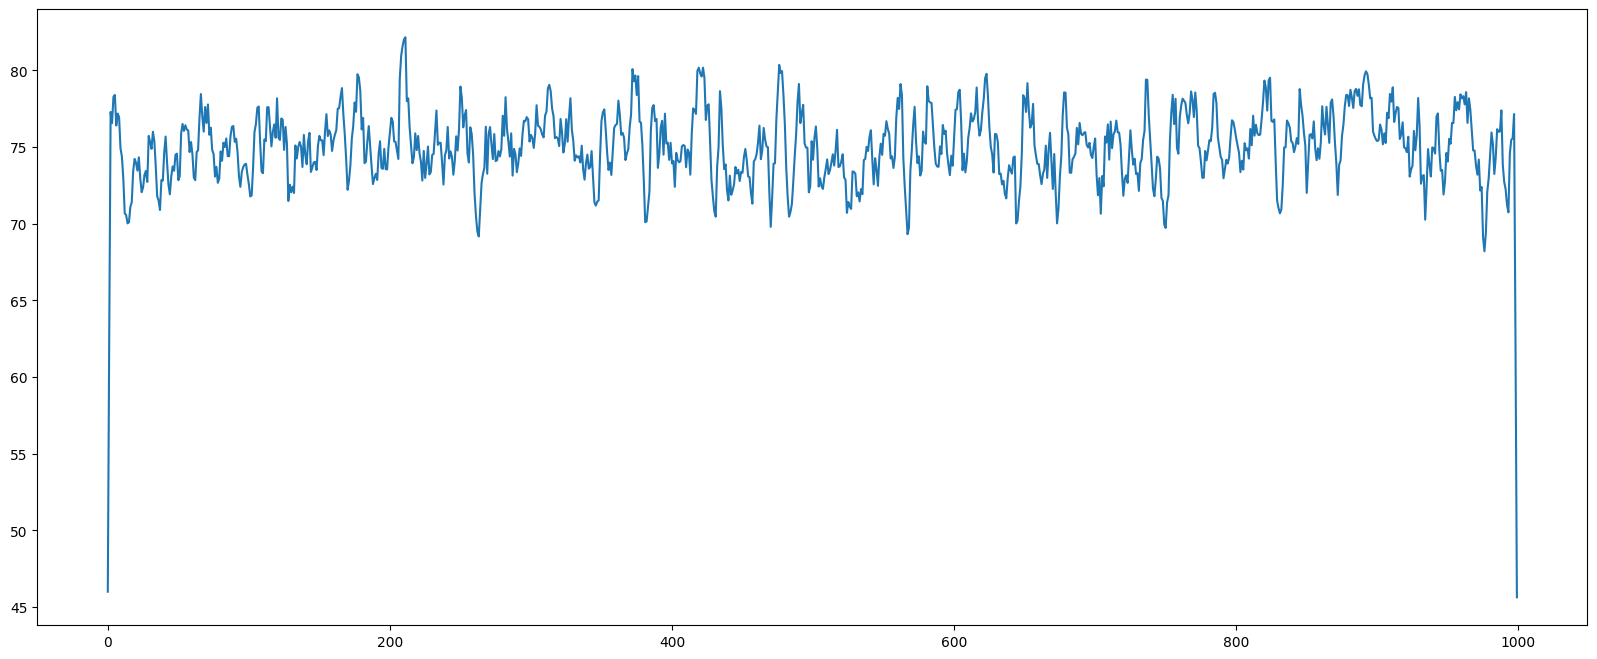

In [7]:
plt.figure(figsize=(20, 8))
plt.plot(df['Temperature'])

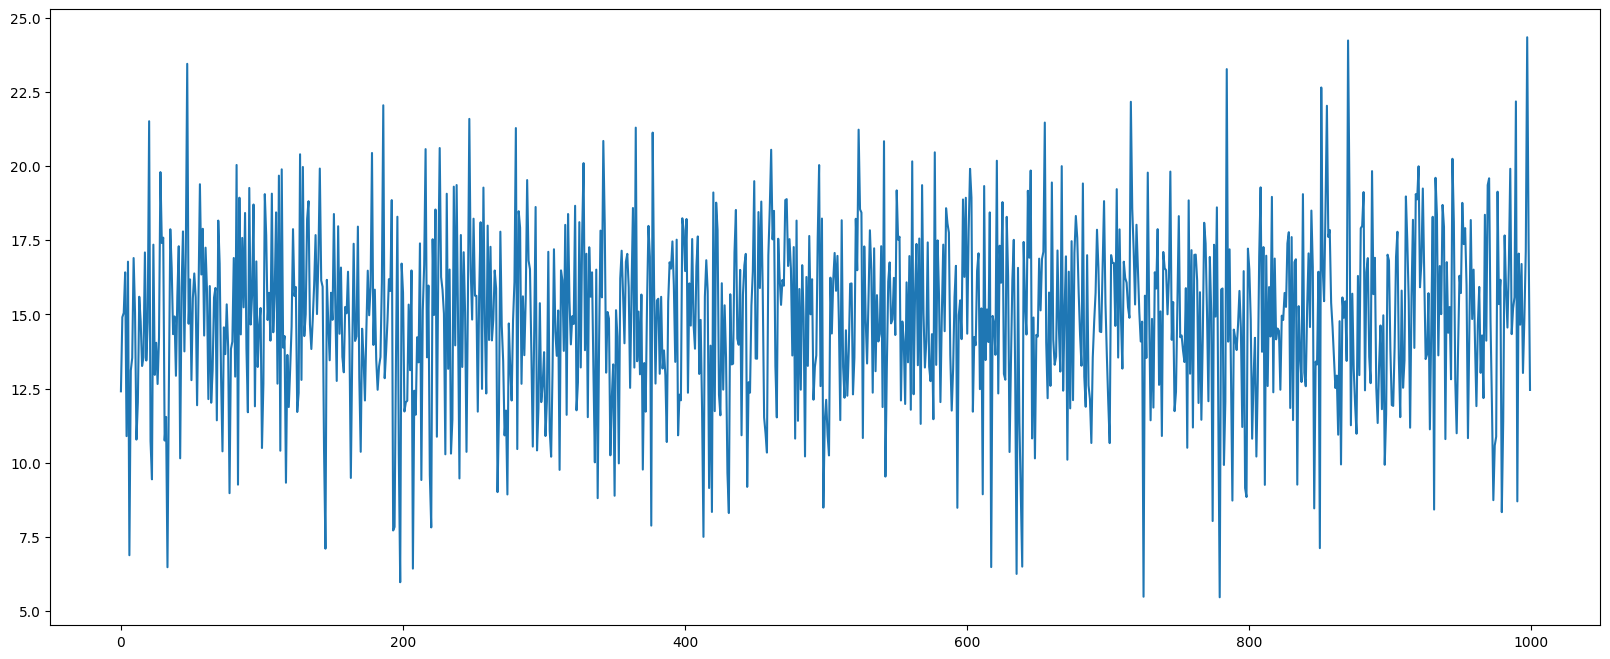

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(df['Current'])

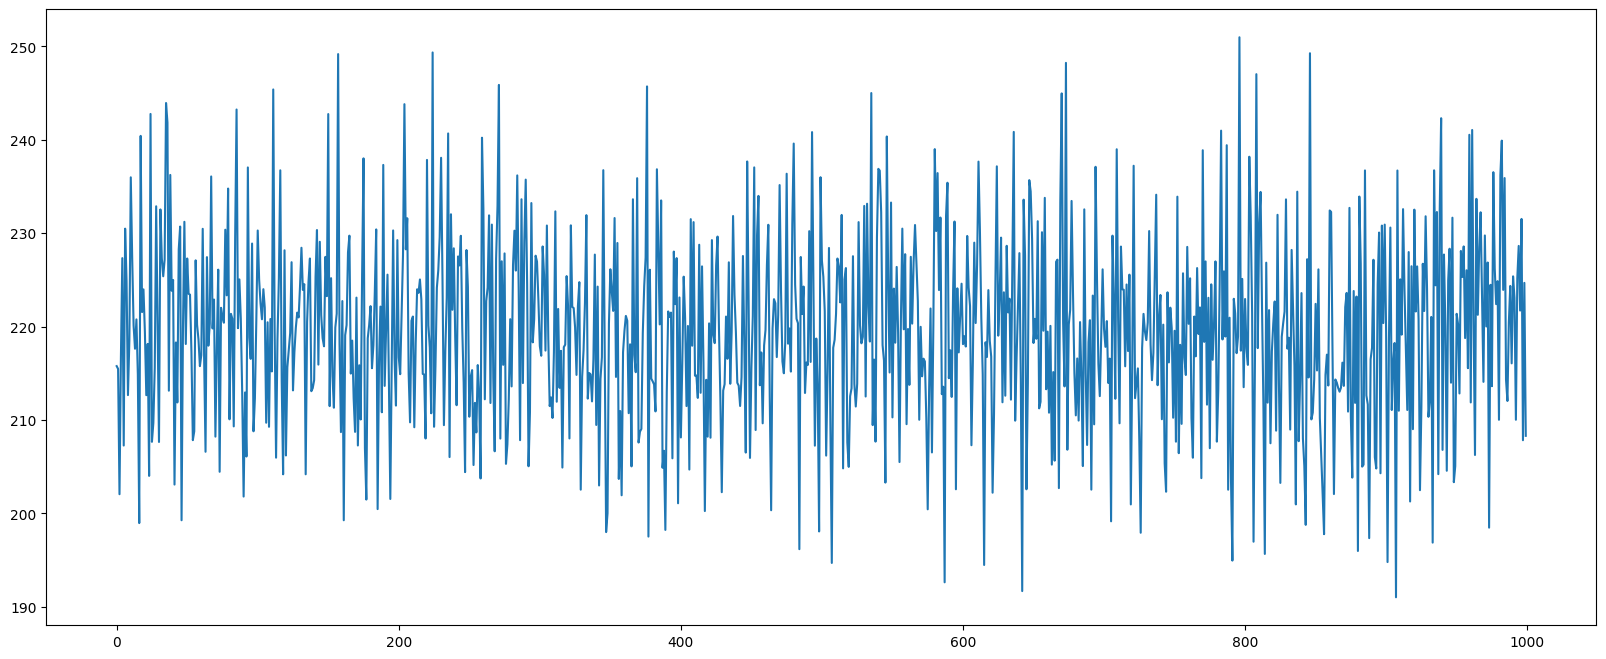

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(df['Voltage'])

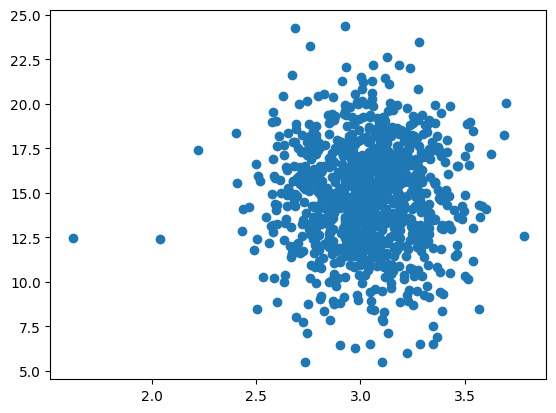

In [10]:
plt.scatter(df['Vibration'], df['Current'])

In [33]:
def make_missing_blocks(df, column, block_size=24, keep_n=1, random_state=None):
    """
    Делает искусственные пропуски в столбце df[column].
    Из каждых block_size строк оставляет только keep_n случайных значений, остальные заменяет на NaN.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    df_corrupted = df.copy()
    n = len(df)

    for start in range(1, n, block_size):
        end = min(start + block_size, n)
        block_indices = np.arange(start, end)
        
        # если в блоке меньше, чем keep_n — оставляем все
        if len(block_indices) <= keep_n:
            continue
        
        # выбираем случайные индексы, которые сохраняем
        keep_indices = np.random.choice(block_indices, size=keep_n, replace=False)
        
        # всё остальное ставим NaN
        drop_indices = np.setdiff1d(block_indices, keep_indices)
        df_corrupted.loc[drop_indices, column] = np.nan
    
    return df_corrupted

In [34]:
df.columns

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')

In [62]:
# --- Примеры разных уровней плотности ---
df = make_missing_blocks(df, 'Flow_Rate', block_size=24, keep_n=1, random_state=0)
df = make_missing_blocks(df, 'Temperature', block_size=24, keep_n=3, random_state=0)
df = make_missing_blocks(df, 'FFT_Vib_0', block_size=24, keep_n=5, random_state=0)
df = make_missing_blocks(df, 'FFT_Pres_0', block_size=24, keep_n=5, random_state=0)
df = make_missing_blocks(df, 'FFT_Temp_0', block_size=24, keep_n=8, random_state=0)
df = make_missing_blocks(df, 'FFT_Temp_1', block_size=24, keep_n=8, random_state=0)

df

,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0
1,NaN,2.573668,76.159843,NaN,14.906390,215.465859,NaN,NaN,NaN,NaN,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0
2,NaN,3.243491,92.372614,NaN,15.054051,202.043568,765.965069,NaN,NaN,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0
3,NaN,3.142904,94.149558,NaN,16.417891,216.699098,NaN,NaN,NaN,NaN,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0
4,NaN,3.139960,94.441006,NaN,10.899425,227.328291,NaN,NaN,NaN,NaN,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,NaN,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
996,NaN,3.035014,96.951461,NaN,17.134232,231.526481,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
997,NaN,2.925378,98.544780,NaN,24.338731,207.825962,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [63]:
pd.DataFrame(df, columns=df.columns).to_csv("/Users/kathrinebovkun/PycharmProjects/experiments/data/Industrial_fault_detection_with_nans.csv", index=False)

In [47]:
df_model = pd.read_csv('/Users/kathrinebovkun/PycharmProjects/experiments/data/imputed_result.csv')
print(df_model.columns)
df_model

Index(['Temperature', 'Vibration', 'Pressure', 'Flow_Rate', 'Current',
       'Voltage', 'FFT_Temp_0', 'FFT_Vib_0', 'FFT_Pres_0', 'FFT_Temp_1',
       'FFT_Vib_1', 'FFT_Pres_1', 'FFT_Temp_2', 'FFT_Vib_2', 'FFT_Pres_2',
       'FFT_Temp_3', 'FFT_Vib_3', 'FFT_Pres_3', 'FFT_Temp_4', 'FFT_Vib_4',
       'FFT_Pres_4', 'FFT_Temp_5', 'FFT_Vib_5', 'FFT_Pres_5', 'FFT_Temp_6',
       'FFT_Vib_6', 'FFT_Pres_6', 'FFT_Temp_7', 'FFT_Vib_7', 'FFT_Pres_7',
       'FFT_Temp_8', 'FFT_Vib_8', 'FFT_Pres_8', 'FFT_Temp_9', 'FFT_Vib_9',
       'FFT_Pres_9', 'Fault_Type'],
      dtype='object')


,Temperature,Vibration,Pressure,Flow_Rate,Current,Voltage,FFT_Temp_0,FFT_Vib_0,FFT_Pres_0,FFT_Temp_1,...,FFT_Temp_7,FFT_Vib_7,FFT_Pres_7,FFT_Temp_8,FFT_Vib_8,FFT_Pres_8,FFT_Temp_9,FFT_Vib_9,FFT_Pres_9,Fault_Type
0,46.006138,2.038362,56.775766,6.184385,12.409519,215.762403,772.403056,32.436537,971.805333,3.760640,...,22.088538,1.289962,33.970445,8.787639,1.157286,4.368856,3.760640,0.734033,30.874568,0.0
1,62.529168,2.573668,76.159843,8.279230,14.906390,215.465859,767.602396,32.395556,962.481517,8.365137,...,19.490310,1.283113,41.364096,12.553525,1.130837,8.104435,8.365137,0.724559,27.268295,0.0
2,77.295015,3.243491,92.372614,9.172789,15.054051,202.043568,765.965069,32.032039,956.299456,9.559769,...,21.108993,0.972256,43.417119,12.291829,0.803430,13.262436,9.559769,0.934401,30.137127,0.0
3,76.564164,3.142904,94.149558,13.775375,16.417891,216.699098,763.936438,33.039854,956.532232,10.251866,...,20.863726,0.606251,43.648908,10.321110,1.139870,13.293431,10.251866,0.169234,29.919938,0.0
4,78.281641,3.139960,94.441006,11.113106,10.899425,227.328291,746.754887,33.018729,950.212816,18.313107,...,8.163300,0.627348,45.461787,14.441649,1.149088,7.149397,18.313107,0.172678,36.065067,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.473825,3.122151,95.858690,10.056915,14.853105,221.714693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
996,75.584630,3.035014,96.951461,5.844376,17.134232,231.526481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
997,77.158833,2.925378,98.544780,9.359404,24.338731,207.825962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
998,62.439933,2.218363,78.389819,13.286756,17.424109,224.679504,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [30]:
data = df.loc[599:998, 'Temperature'].reset_index()
data

,index,Temperature
0,599,73.789067
1,600,75.637436
2,601,77.437368
3,602,77.473502
4,603,78.593309
...,...,...
395,994,74.585805
396,995,75.473825
397,996,75.584630
398,997,77.158833


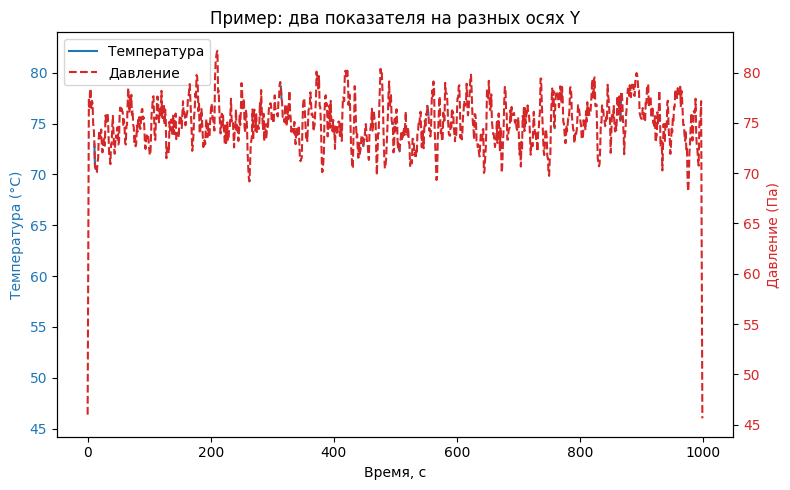

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Создаём фигуру и основную ось
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Первая ось ---
color1 = 'tab:blue'
ax1.set_xlabel('Время, с')
ax1.set_ylabel('Температура (°C)', color=color1)
ax1.plot(df['Temperature'], color=color1, label='Температура')
ax1.tick_params(axis='y', labelcolor=color1)

# --- Вторая ось (дочерняя) ---
ax2 = ax1.twinx()  # создаём вторую ось Y, общую по X
color2 = 'tab:red'
ax2.set_ylabel('Давление (Па)', color=color2)
ax2.plot(df_model['Temperature'], color=color2, linestyle='--', label='Давление')
ax2.tick_params(axis='y', labelcolor=color2)

# --- Легенды ---
# Чтобы объединить легенды с обеих осей:
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# --- Украшения ---
plt.title("Пример: два показателя на разных осях Y")
fig.tight_layout()  # чтобы ничего не налезало
plt.show()


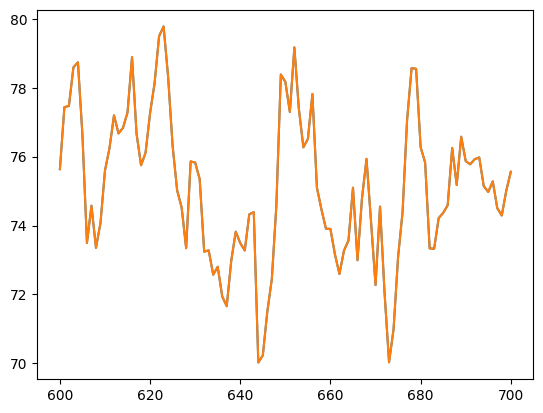

In [60]:
plt.plot(df_model.loc[600:700, 'Temperature'])
plt.plot(df.loc[600:700, 'Temperature'])